In [1]:
import sys
sys.path.append('..')
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import datetime
import theano_lstm
import numpy as np
import data_managers
import os

# Plotting
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline


Using gpu device 0: GeForce GTX TITAN X


In [2]:
data_butler = data_managers.character_data_manager('/home/arimorcos/Github/CS281-Final-Project/data manager/',
                                                   batch_size=128)

In [3]:
# Create network 
config.mode="FAST_RUN"
hidden_size = 128
network = theano_lstm.lstm_rnn(300,
                  [(hidden_size, hidden_size),
                   (hidden_size, hidden_size)],
                  150, dropout=0.2)
network.initialize_training_adadelta()

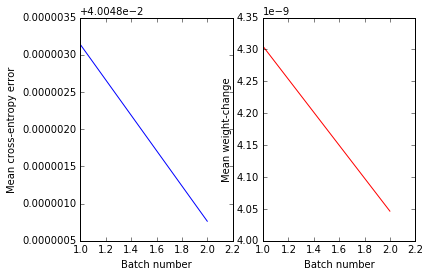

In [ ]:
batch_size = 64
num_batches = 500
should_reinitialize = True

# Re-initialize network 
if should_reinitialize:
    network.initialize_network_weights()
    root_dir = '/media/1_TB_Internal/lstm_rnn_data'
    new_log_dir = os.path.join(root_dir, datetime.datetime.now().strftime('%y%m%d_%H%M%S'))
    network.set_log_dir(new_log_dir)

#Create plot 
fig = plt.figure()
ax_cost = fig.add_subplot(121)
ax_cost.set_xlabel('Batch number')
ax_cost.set_ylabel('Mean cross-entropy error')

ax_weight_change = fig.add_subplot(122)
ax_weight_change.set_xlabel('Batch number')
ax_weight_change.set_ylabel('Mean weight-change')

# Initialize cost 
cost = []
mean_diff_mag = []

# Offer data
vectors, lengths, answers = data_butler.offer_data()

for batch in range(num_batches):
    
    # Get data
    vectors, lengths, answers = data_butler.permute_examples()
    
    # Step 
    temp_cost, param_diff = network.adadelta_step(vectors, lengths, answers)
    cost.append(temp_cost.tolist())
    
    # Calculate mean param_diff magnitude
    temp_mean_diff_mag = np.mean([np.abs(diff).mean() for diff in param_diff])
    mean_diff_mag.append(temp_mean_diff_mag)
    
    # Update plot 
    ax_cost.plot(range(1, batch+2), cost, 'b')
    ax_weight_change.plot(range(1, batch+2), mean_diff_mag, 'r')
    display.clear_output(wait=True)
    display.display(fig)